##### Purpose of the notebook ####

Explore gene modules present within different cell types, defining subtypes. In this case: oligodendrocytes.

In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from xb.formatting import *

# format to adata using modules from xenium benchmarking 

In [2]:
files=['/media/sergio/GBX/xenium_prerelease_nov23_5k_v2/xenium_prerelease_nov23_5k/hLiver_FF']
output_path=r'/media/sergio/GBX/xenium_prerelease_nov23_5k_v2/xenium_prerelease_nov23_5k/pipeline_output_5000Kliver/'
save=True ## Saving intermediate outputs
plot_path=output_path+'/figures/'

In [4]:
max_nucleus_distance=1
min_quality=10

In [5]:
adata=format_to_adata(files=files,output_path=output_path,max_nucleus_distance=max_nucleus_distance,min_quality=min_quality,save=save)

Formatting hLiver_FF


/media/sergio/xenium_b_and_heart/actual_repo/Xenium_benchmarking/xb/formatting.py:535: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata=sc.AnnData(ad.transpose(),obs=cell_info,var=features)
/home/sergio/anaconda3/envs/xb_dev3/lib/python3.7/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Filter reads


/media/sergio/xenium_b_and_heart/actual_repo/Xenium_benchmarking/xb/formatting.py:627: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata1nuc=sc.AnnData(np.array(ct1),obs=adataobs,var=av)


# Start CNV inference with InferCNV

In [1]:
import scanpy as sc
import infercnvpy as cnv
import matplotlib.pyplot as plt
import warnings

In [2]:
adata=sc.read('/media/sergio/GBX/xenium_prerelease_nov23_5k_v2/xenium_prerelease_nov23_5k/pipeline_output_5000Kliver/combined_filtered.h5ad')

In [3]:
dat = cnv.datasets.maynard2020_3k()
dat.var.loc[:, ["ensg", "chromosome", "start", "end"]].head()

ensg chromosome      start        end
symbol                                                        
AL645933.5  ENSG00000288587.1       chr6   31400702   31463705
AC010184.1  ENSG00000288585.1       chr3  141449745  141456434
AC023296.1  ENSG00000288580.1       chr8    2923568    2926689
AL117334.2  ENSG00000288577.1      chr20    3406380    3410036
AC107294.4  ENSG00000288576.1       chr3  184778723  184780720

In [4]:
adata=adata[:,adata.var.index.isin(dat.var['gene_name'])]

In [5]:
name2gid=dict(zip(dat.var['gene_name'],dat.var['gene_id']))
name2symbol=dict(zip(dat.var['gene_name'],dat.var.index))

In [6]:
adata.var['gene_id']=adata.var.index.map(name2gid)
adata.var['symbol']=adata.var.index.map(name2symbol)

/tmp/ipykernel_62576/4285209568.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['gene_id']=adata.var.index.map(name2gid)


In [7]:
name2ensg=dict(zip(dat.var['gene_name'],dat.var['ensg']))
name2chromosome=dict(zip(dat.var['gene_name'],dat.var['chromosome']))
name2start=dict(zip(dat.var['gene_name'],dat.var['start']))
name2end=dict(zip(dat.var['gene_name'],dat.var['end']))

In [8]:
adata.var['ensg']=adata.var.index.map(name2ensg)
adata.var['chromosome']=adata.var.index.map(name2chromosome)
adata.var['start']=adata.var.index.map(name2start)
adata.var['end']=adata.var.index.map(name2end)

In [9]:
#sc.pp.subsample(adata,0.1)

In [10]:
adata.layers['raw']=adata.X.copy()

In [11]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata,n_pcs=50)

2024-05-27 17:11:12.816742: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.4/include:/usr/local/cuda-11.4/lib64:/usr/local/cuda-11.4/include:/usr/local/cuda-11.4/lib64:
2024-05-27 17:11:12.816768: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [12]:
sc.tl.umap(adata)
sc.tl.leiden(adata)

In [14]:
adata

AnnData object with n_obs × n_vars = 23301 × 4990
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'graph_clusters', 'kmeans2', 'kmeans3', 'kmeans4', 'kmeans5', 'kmeans6', 'kmeans7', 'kmeans8', 'kmeans9', 'kmeans10', 'sample', 'expressed_genes', 'unique_cell_id', 'leiden'
    var: 'gene_id', 'reason_of_inclusion', 'Ensembl ID', 'in_panel', 'ENSMBL_ID', 'symbol', 'ensg', 'chromosome', 'start', 'end'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw'
    obsp: 'distances', 'connectivities'

... storing 'chromosome' as categorical


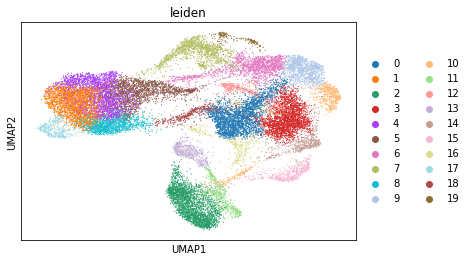

In [15]:
sc.pl.umap(adata,color='leiden')

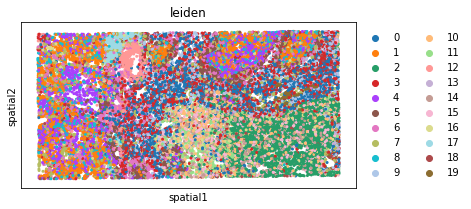

In [16]:
sc.pl.spatial(adata,color='leiden',spot_size=30)

In [17]:
import numpy as np
sc.tl.rank_genes_groups(adata,groupby='leiden')

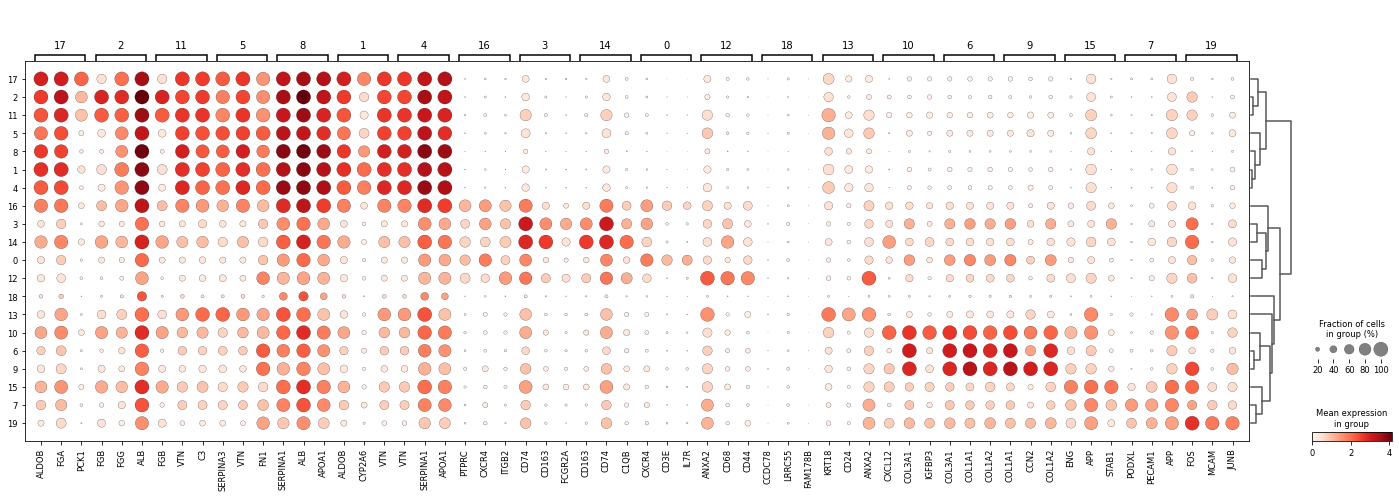

In [18]:
sc.pl.rank_genes_groups_dotplot(adata,n_genes=3)

In [30]:
sc.settings.set_figure_params(figsize=(10, 10))
# We provide all immune cell types as "normal cells".
cnv.tl.infercnv(
    adata,
    reference_key="leiden",
    reference_cat=[
    '3','0','12'],
    window_size=50,
)

  0%|          | 0/5 [00:00<?, ?it/s]

categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


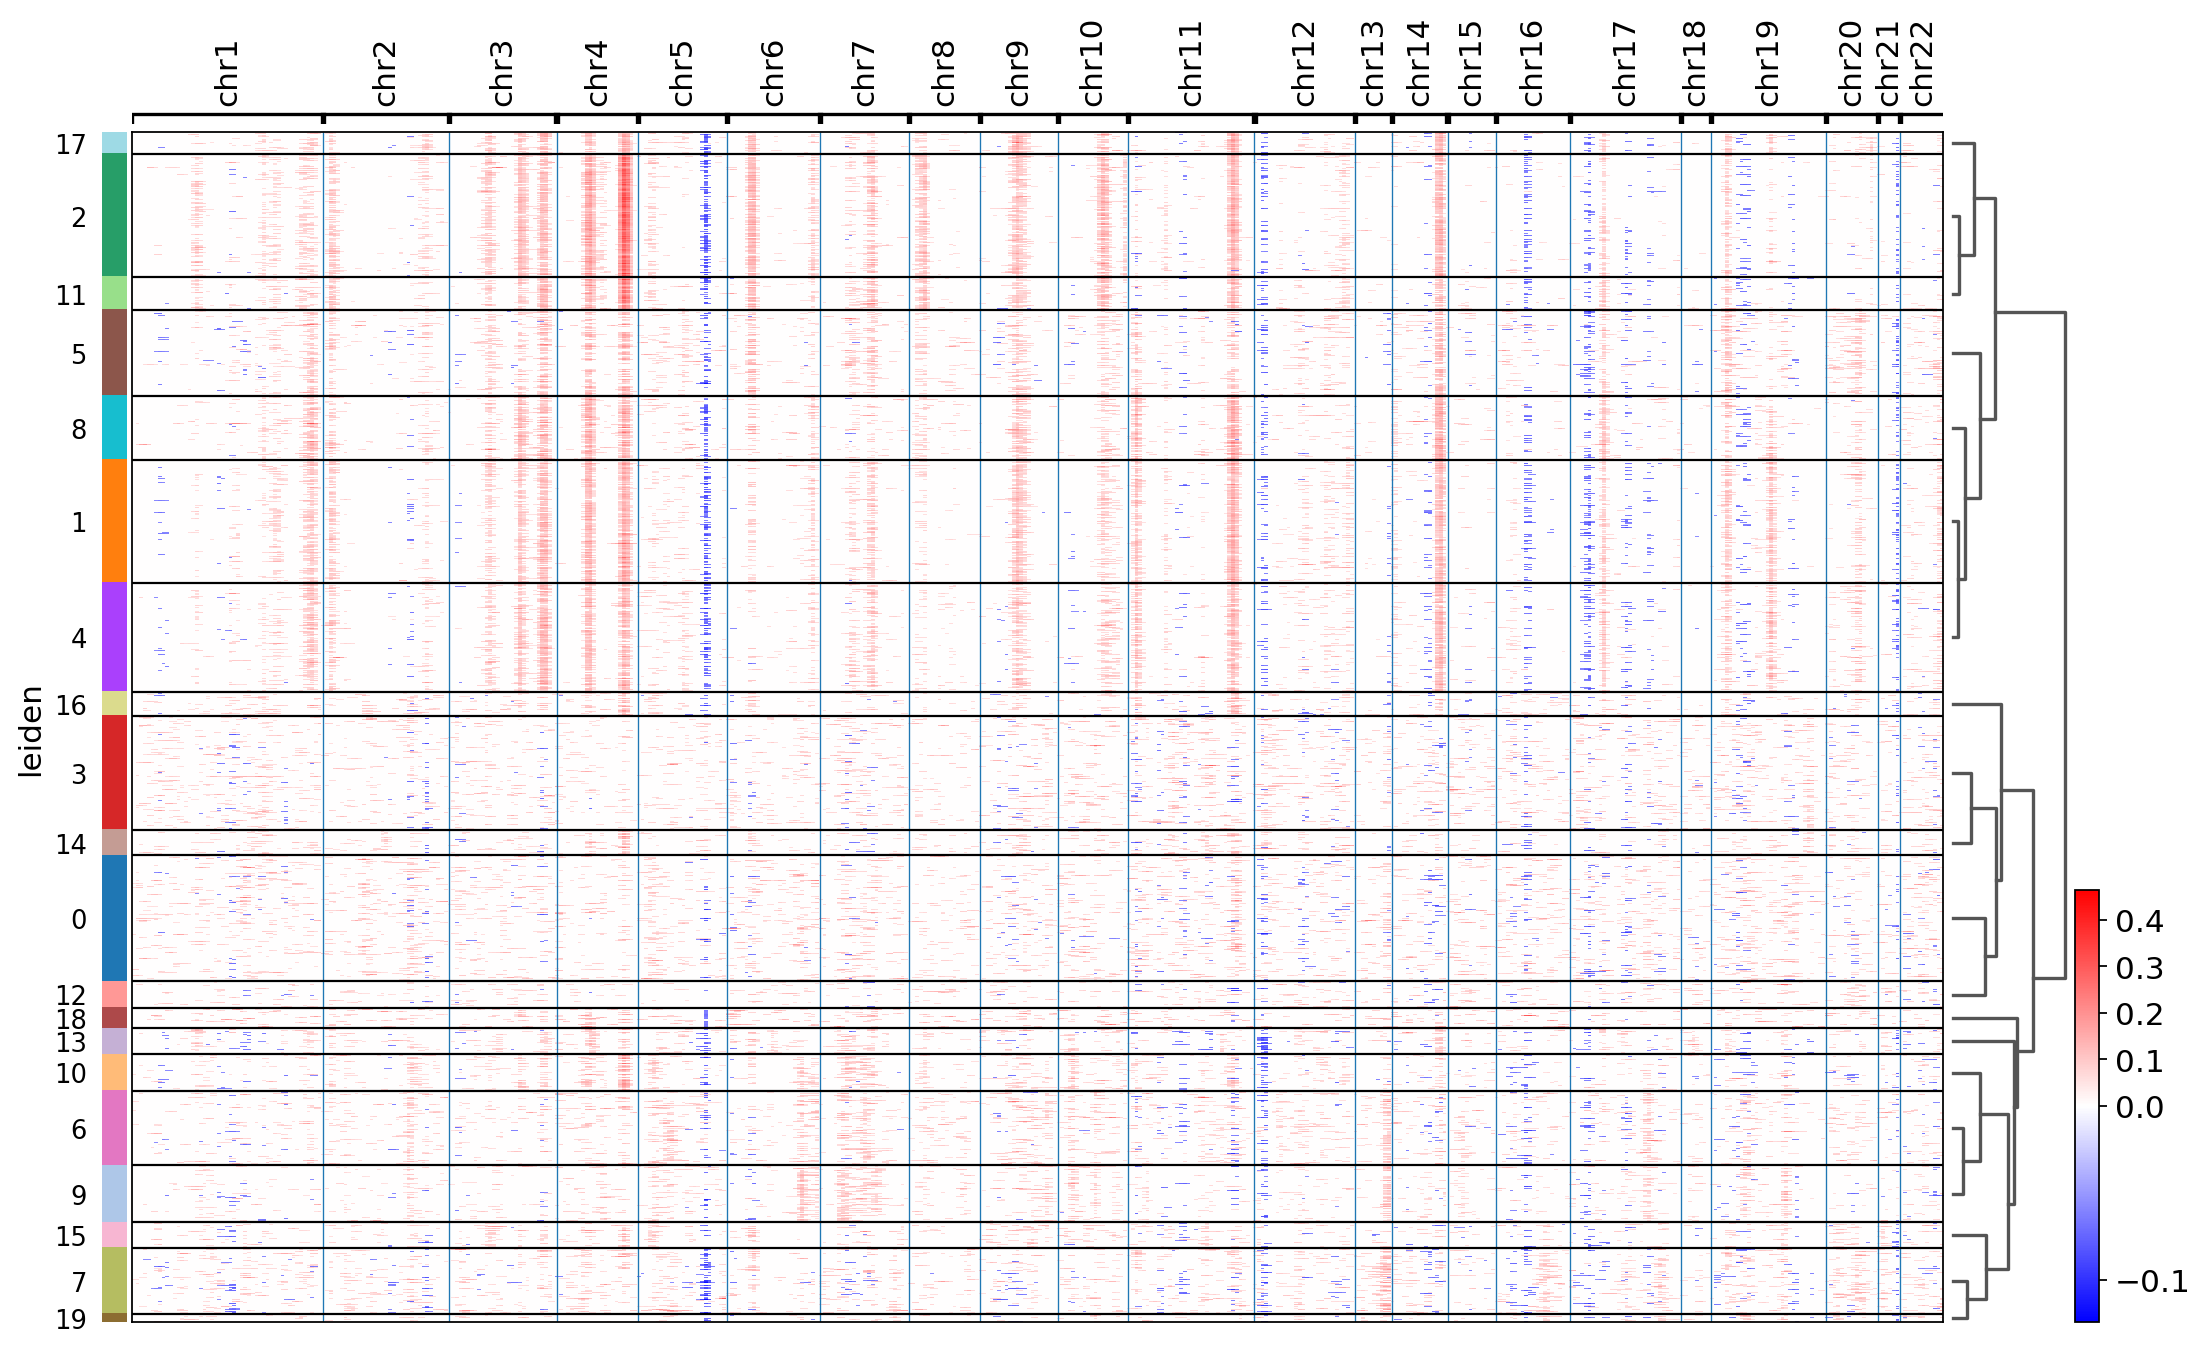

In [31]:
cnv.pl.chromosome_heatmap(adata, groupby="leiden",dendrogram=True)

In [32]:
cnv.tl.pca(adata)
cnv.pp.neighbors(adata)

In [33]:
cnv.tl.leiden(adata,resolution=0.8)

In [ ]:
cnv.pl.chromosome_heatmap(adata, groupby="cnv_leiden", dendrogram=True)

In [24]:
cnv.tl.cnv_score(adata)

In [25]:
cnv.tl.umap(adata)

In [26]:
adata.obs['cnv_leiden']=adata.obs['cnv_leiden'].astype(str).astype(int)
adata.obs.loc[adata.obs['cnv_leiden']>10,'cnv_leiden']=10
adata.obs['cnv_leiden']=adata.obs['cnv_leiden'].astype(str).astype(str)

... storing 'cnv_leiden' as categorical


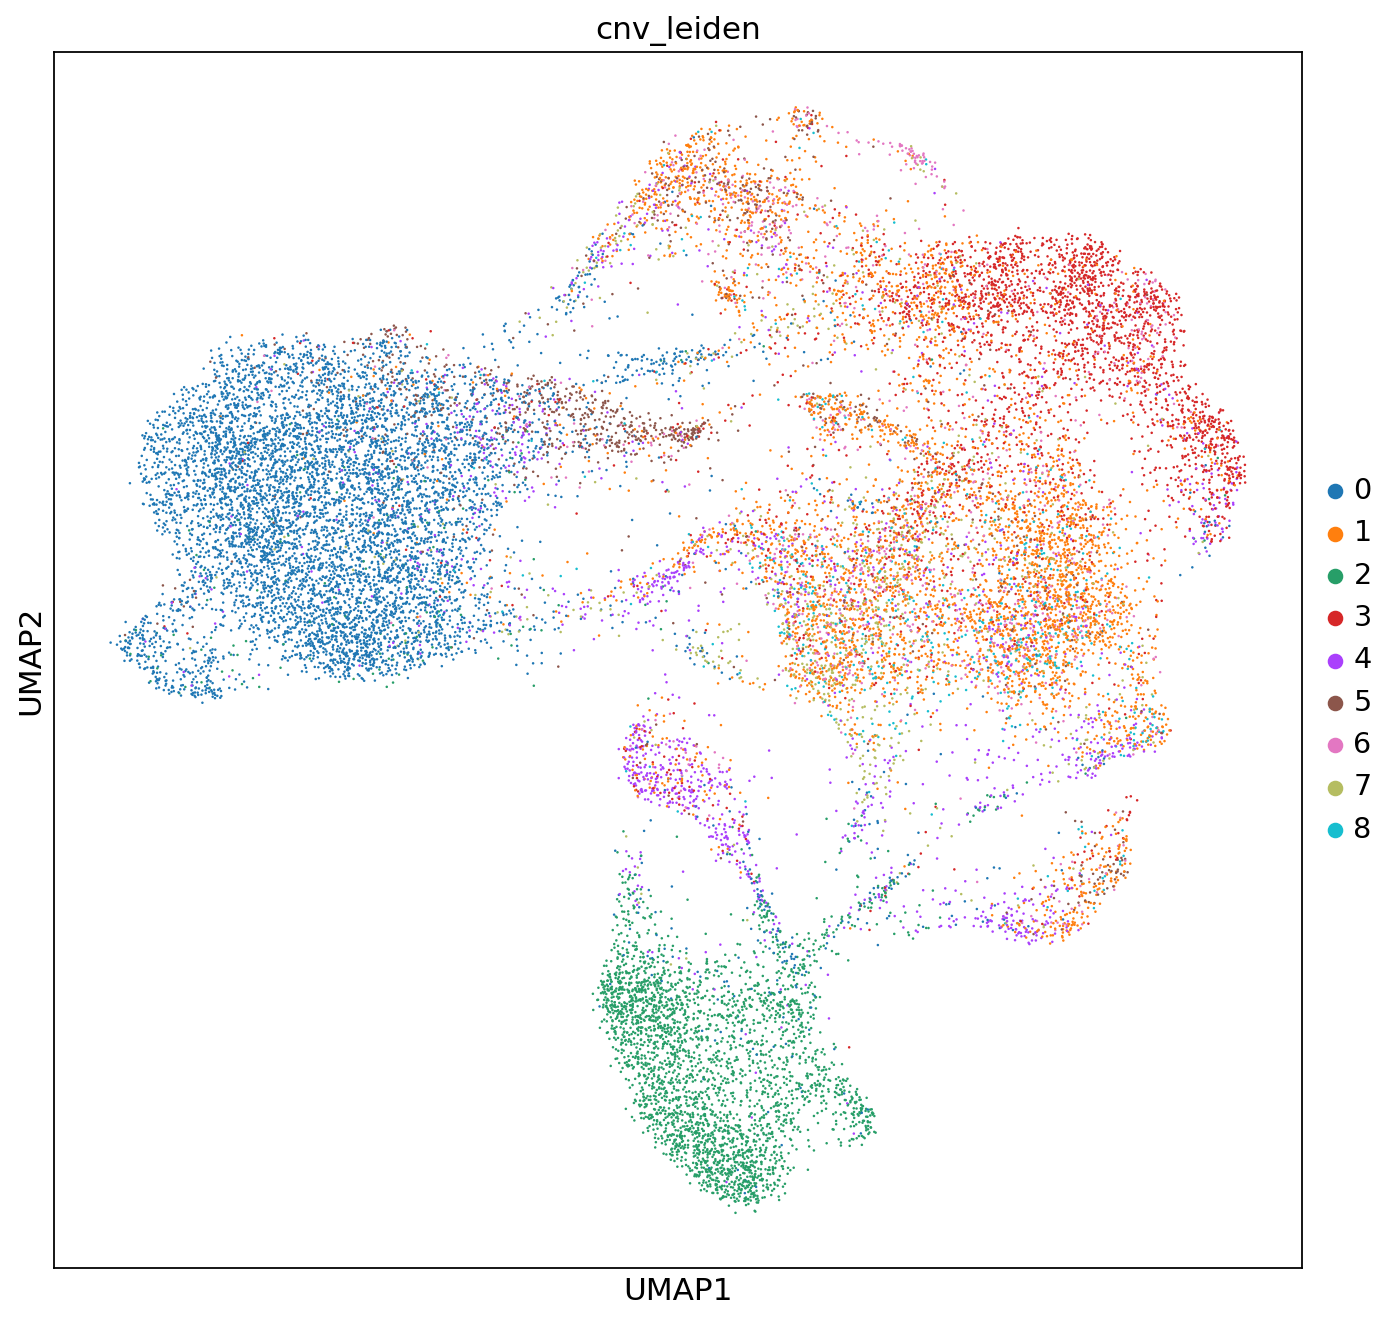

In [27]:
sc.settings.set_figure_params(figsize=(10, 10))
sc.pl.umap(
    adata,color="cnv_leiden",
    legend_fontoutline=2,cmap='tab20'
)

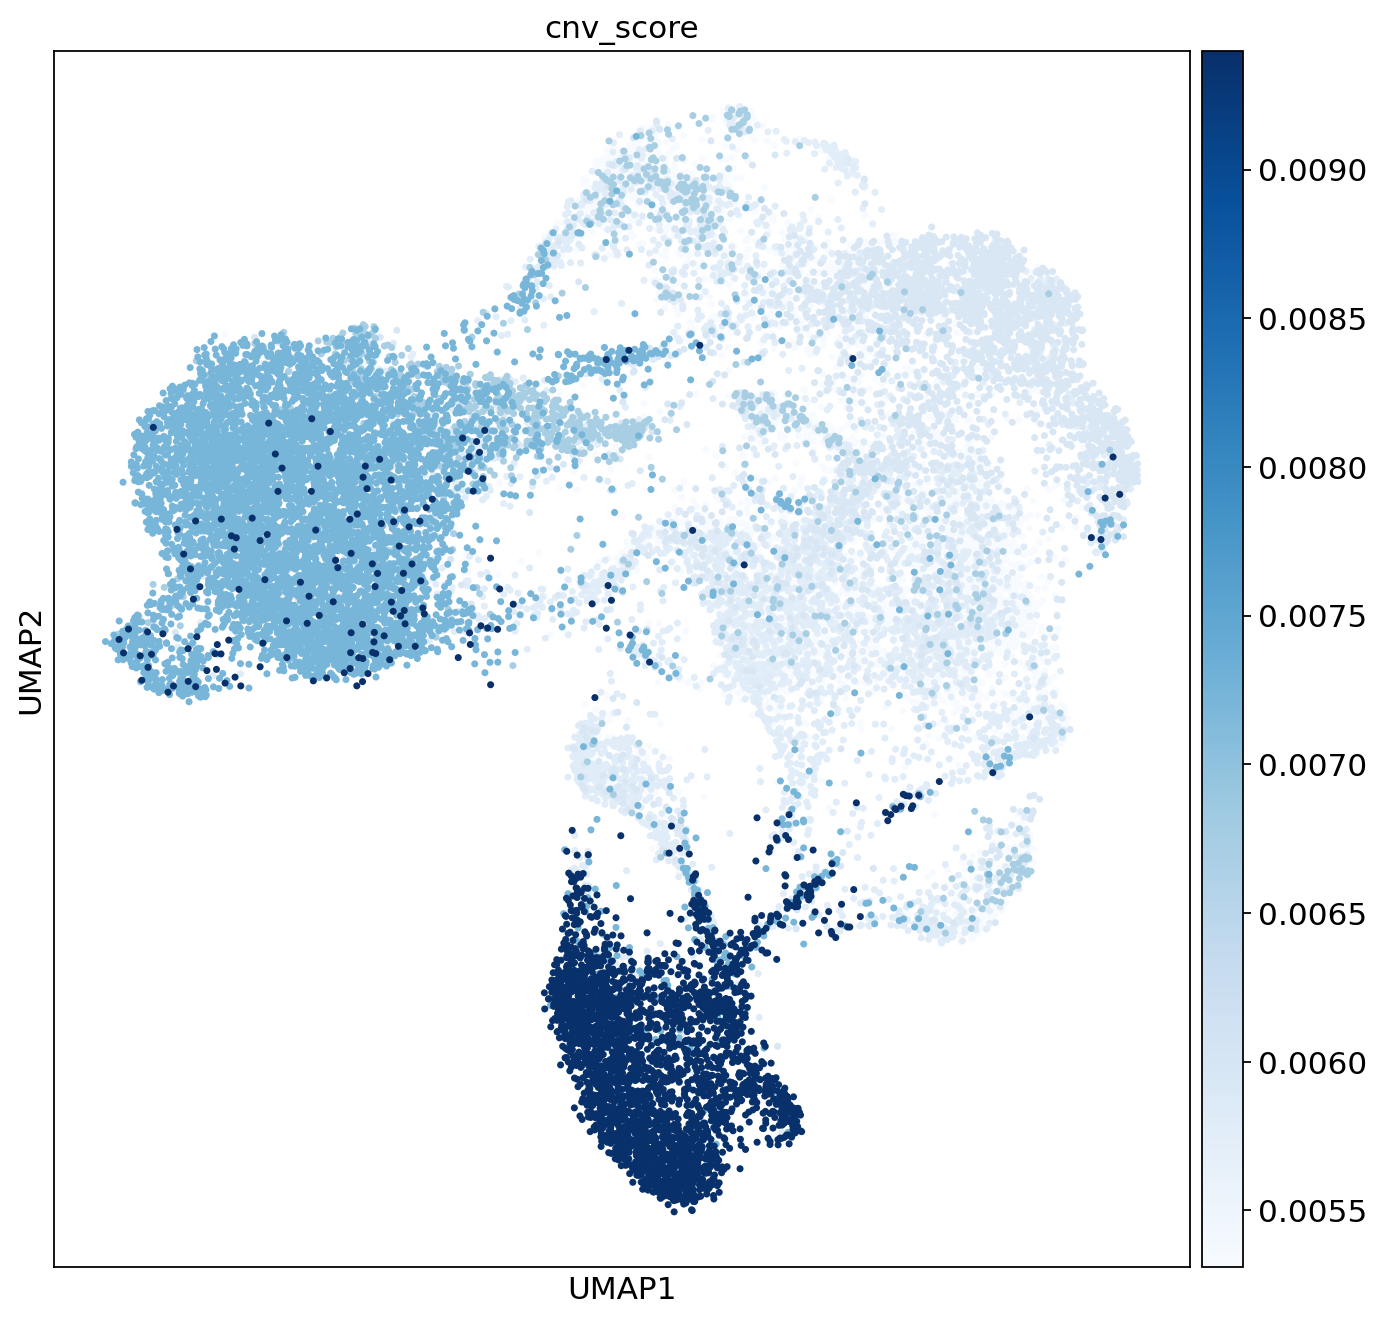

In [28]:
sc.settings.set_figure_params(figsize=(10, 10))
sc.pl.umap(
    adata,color="cnv_score",
    legend_fontoutline=2,cmap='Blues',s=40
)

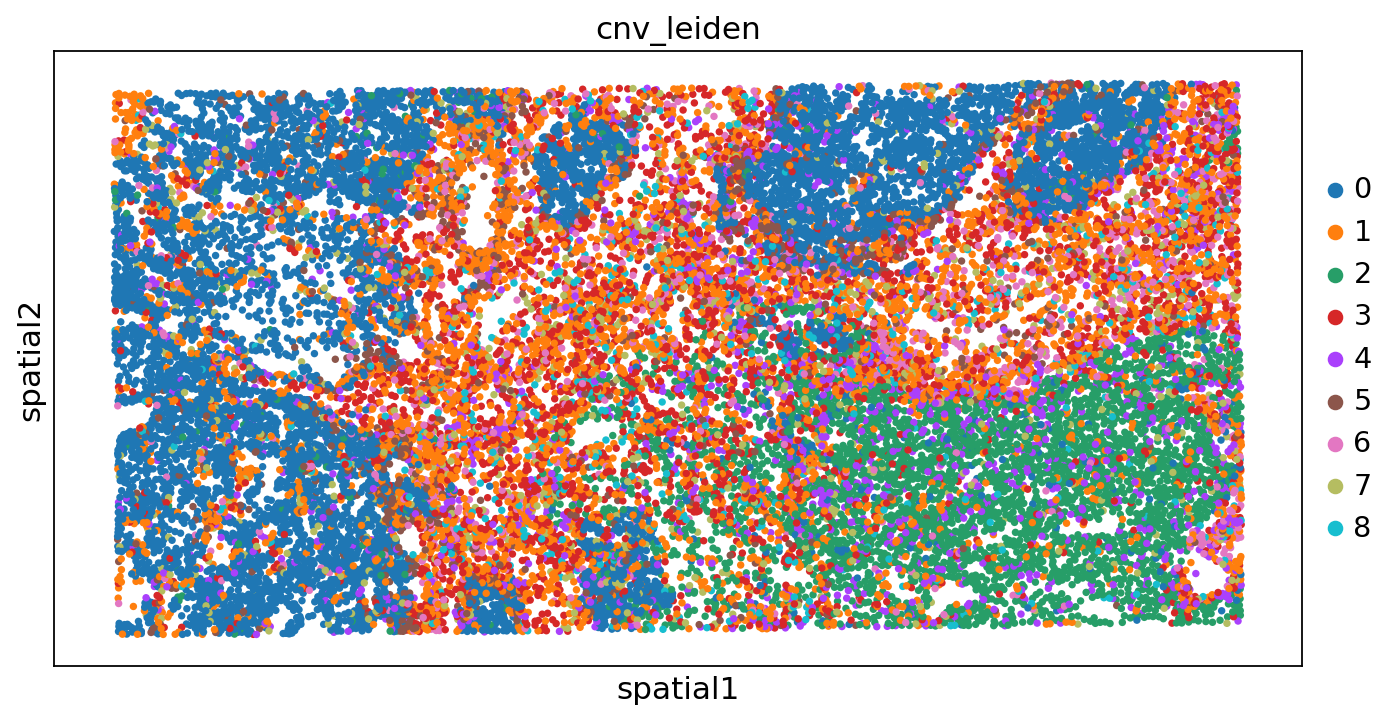

In [29]:
sc.pl.spatial(adata,color='cnv_leiden',spot_size=20)